In [2]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold

/Users/steeve/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [50]:
data = pd.read_csv("./Preprocessing/Data_Structures/FINAL_BASE_DATASET_WITH_BETS.csv")

data.head()
y = data.Label
X = data.drop("Label", axis = 1)
print y.value_counts()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

2    7255
0    4518
1    3994
Name: Label, dtype: int64


In [1]:
def get_xgb_params():
    params = {}
    params['objective'] = 'multi:softmax'
    params['silent'] = 0
        
    #params['learning_rate'], params['n_estimators'] = 0.1, 81 #0.437689
    params['learning_rate'], params['n_estimators'] = 0.15, 38 #0.436553
    params['max_depth'] = 6
    params['min_child_weight'] = 9
    params['gamma'] = 6
    params['colsample_bytree'] = 0.65
    params['subsample'] = 0.95
    params['reg_alpha'] = 0
    return params

In [2]:
xgbm = xgb.XGBClassifier(**get_xgb_params())
xgtrain = xgb.DMatrix(X_train, label=y_train)
params = xgbm.get_xgb_params()
params['num_class'] = 3
cvresult = xgb.cv(params, xgtrain, num_boost_round=10000, nfold=10, metrics='merror', early_stopping_rounds=50, verbose_eval=True)

print np.min(cvresult)

NameError: name 'xgb' is not defined

In [47]:
params = {
    #'max_depth' : range(5,8,1),
    #'min_child_weight' : [1,2,3,4,5,6,7,8,9,10,11,37,48]
    #'gamma':np.linspace(0,10,101)
    #'subsample': np.linspace(0.5,1,11),
    #'colsample_bytree':np.linspace(0.5,1,11),    
    #'reg_alpha':[0,1e-8, 1e-7, 1e-6,1e-5,1e-4]
    'learning_rate' : np.linspace(0.12,0.18,7)
}

xgb_model = xgb.XGBClassifier(**get_xgb_params())
gscv = GridSearchCV(xgb_model, params, n_jobs=1, 
                   cv=StratifiedKFold(n_splits=10, shuffle=True),
                   verbose=2, refit=True, scoring='accuracy')
gscv.fit(X_train, y_train)

gscv.grid_scores_, gscv.best_score_, gscv.best_params_

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV] learning_rate=0.12 ..............................................
[CV] ............................... learning_rate=0.12, total=   1.7s
[CV] learning_rate=0.12 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] ............................... learning_rate=0.12, total=   1.6s
[CV] learning_rate=0.12 ..............................................
[CV] ............................... learning_rate=0.12, total=   1.9s
[CV] learning_rate=0.12 ..............................................
[CV] ............................... learning_rate=0.12, total=   1.7s
[CV] learning_rate=0.12 ..............................................
[CV] ............................... learning_rate=0.12, total=   1.7s
[CV] learning_rate=0.12 ..............................................
[CV] ............................... learning_rate=0.12, total=   1.9s
[CV] learning_rate=0.12 ..............................................
[CV] ............................... learning_rate=0.12, total=   1.9s
[CV] learning_rate=0.12 ..............................................
[CV] ............................... learning_rate=0.12, total=   1.8s
[CV] learning_rate=0.12 ..............................................
[CV] .

[CV] ............................... learning_rate=0.17, total=   2.5s
[CV] learning_rate=0.18 ..............................................
[CV] ............................... learning_rate=0.18, total=   2.2s
[CV] learning_rate=0.18 ..............................................
[CV] ............................... learning_rate=0.18, total=   2.5s
[CV] learning_rate=0.18 ..............................................
[CV] ............................... learning_rate=0.18, total=   2.3s
[CV] learning_rate=0.18 ..............................................
[CV] ............................... learning_rate=0.18, total=   2.0s
[CV] learning_rate=0.18 ..............................................
[CV] ............................... learning_rate=0.18, total=   2.1s
[CV] learning_rate=0.18 ..............................................
[CV] ............................... learning_rate=0.18, total=   2.2s
[CV] learning_rate=0.18 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  2.6min finished
/Users/steeve/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.56187, std: 0.01000, params: {'learning_rate': 0.12},
  mean: 0.56158, std: 0.00760, params: {'learning_rate': 0.13},
  mean: 0.56196, std: 0.01139, params: {'learning_rate': 0.13999999999999999},
  mean: 0.56262, std: 0.01106, params: {'learning_rate': 0.14999999999999999},
  mean: 0.56035, std: 0.00979, params: {'learning_rate': 0.16},
  mean: 0.56177, std: 0.01111, params: {'learning_rate': 0.16999999999999998},
  mean: 0.56139, std: 0.01003, params: {'learning_rate': 0.17999999999999999}],
 0.562624254473161,
 {'learning_rate': 0.14999999999999999})

/Users/steeve/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


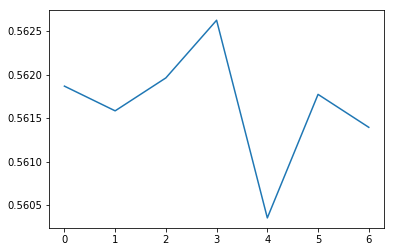

In [48]:
scores = [x[1] for x in gscv.grid_scores_]
#scores = np.array(scores).reshape(len(Cs), len(Gammas))
plt.plot(range(0,len(scores)), scores)
plt.show()

In [66]:
classifier = xgb.XGBClassifier(**get_xgb_params())
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.55,
       gamma=2.4, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=13, missing=None, n_estimators=92, nthread=-1,
       objective='multi:softprob', reg_alpha=0.11, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=0, subsample=0.9)

In [67]:
#classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)
print confusion_matrix(y_pred=y_pred, y_true=y_test)
print f1_score(y_test, y_pred, average='weighted')
print accuracy_score(y_true=y_test, y_pred=y_pred)

[[ 843   60  597]
 [ 346  112  859]
 [ 346  100 1941]]
0.503650669509
0.556495003843


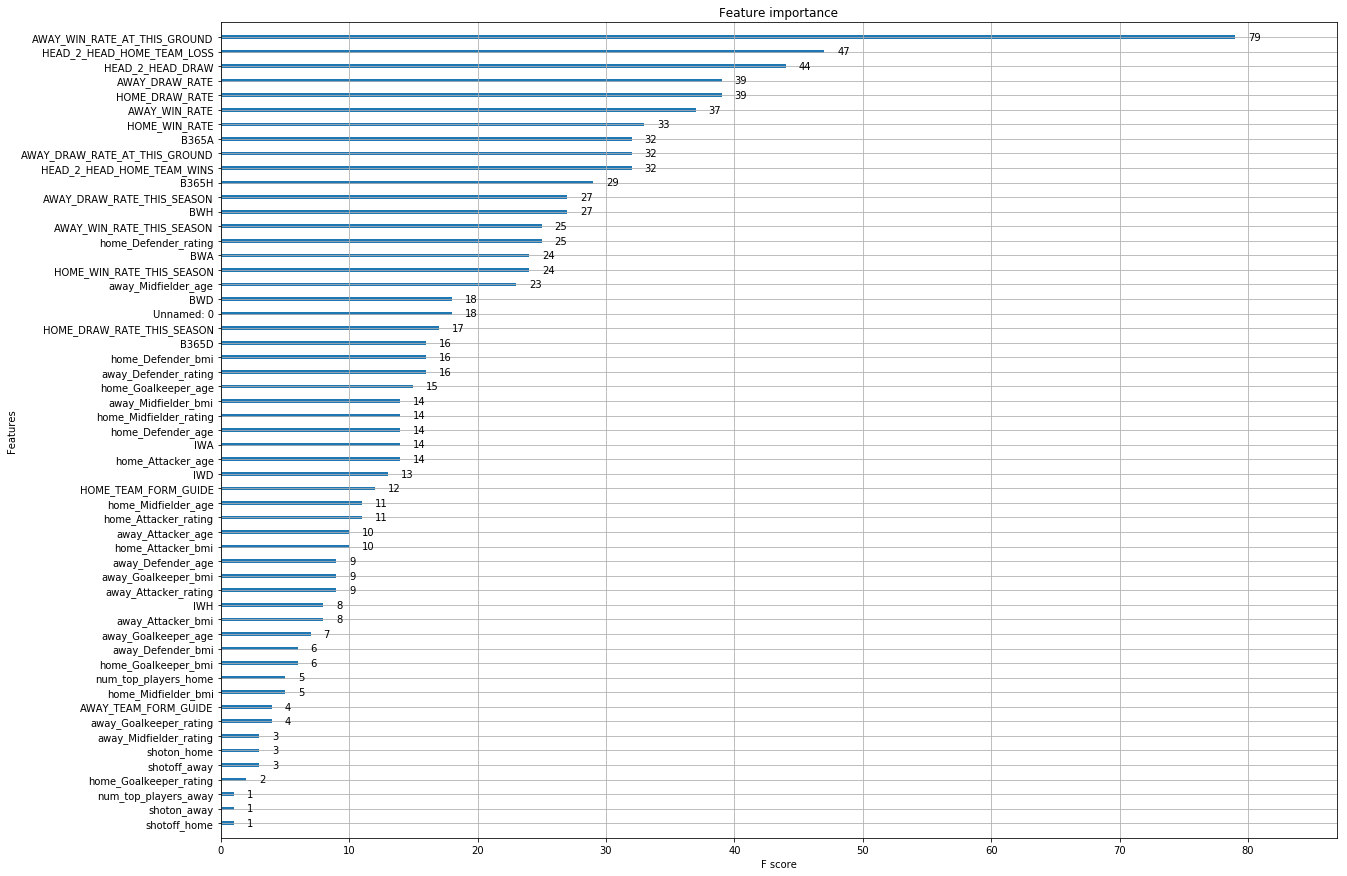

In [54]:
fig, ax = plt.subplots(1,1,figsize=(20,15))
xgb.plot_importance(classifier, height=0.25, ax=ax)
plt.show()